Name: Obembe, Olufemi

Assignment:  Week 7:  Predicting Mushroom Class


Date: January 27, 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset and ensure it loaded correctly**

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**Convert all the features to dummy variables**

In [6]:
df = pd.get_dummies(df,drop_first=True)

In [7]:
df.head().T

,0,1,2,3,4
class_p,1,0,0,1,0
cap-shape_c,0,0,0,0,0
cap-shape_f,0,0,0,0,0
cap-shape_k,0,0,0,0,0
cap-shape_s,0,0,0,0,0
...,...,...,...,...,...
habitat_l,0,0,0,0,0
habitat_m,0,0,1,0,0
habitat_p,0,0,0,0,0
habitat_u,1,0,0,1,0


In [8]:
df.shape

(8124, 96)

**Split the data into training and test sets**

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('class_p',axis=1)
y = df['class_p']

In [12]:
X.shape,y.shape

((8124, 95), (8124,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Fitting a decision tree classifier on the training set**

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
# Instantiate the model

model = DecisionTreeClassifier()

In [16]:
# fit the model on the traing set

model.fit(X_train,y_train)

DecisionTreeClassifier()

**Report the accuracy and create a confusion matrix for the model prediction on the test set**

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
# Accuracy score

model.score(X_test,y_test)

1.0

In [22]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


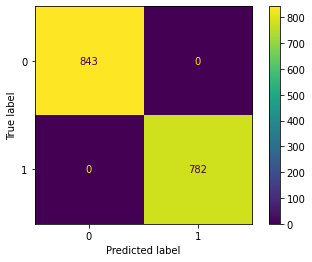

In [23]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
# Plot the confusion matrix

plot_confusion_matrix(model,X_test,y_test)

In [24]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



**Create a visualization of the decision tree**

In [25]:
from sklearn.tree import plot_tree

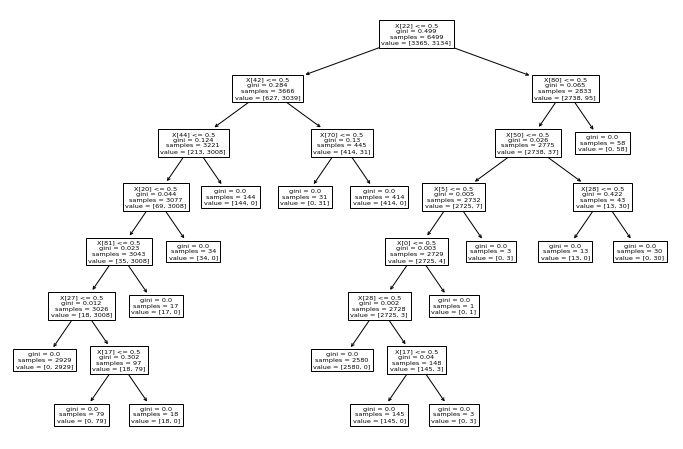

In [26]:
plt.figure(figsize=(12,8))
plot_tree(model);

**Use chi-sq statistic selector to pick the five best features**

In [28]:
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectKBest

In [29]:
chi2_selector = SelectKBest(chi2,k=5)

In [30]:
best_5_features = chi2_selector.fit_transform(X_train,y_train)

In [31]:
#  Show the results

print("Original number of features:",X_train.shape[1])
print("Reduced number of features:",best_5_features.shape[1])

Original number of features: 95
Reduced number of features: 5


In [33]:
from numpy import array

In [35]:
feature_mask = np.array(chi2_selector.get_support())
feature_names = np.array(X_train.columns.tolist())
selected_features = list(feature_names[feature_mask])

In [36]:
selected_features

['odor_f',
 'odor_n',
 'gill-size_n',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_k']

**Repeat steps 4 and 5 with the five best features**

In [37]:
data = df[['odor_f','odor_n','gill-size_n','stalk-surface-above-ring_k','stalk-surface-below-ring_k']]

In [38]:
data.head()

,odor_f,odor_n,gill-size_n,stalk-surface-above-ring_k,stalk-surface-below-ring_k
0,0,0,1,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [39]:
target = df['class_p']

In [40]:
Xc = data
yc = target

In [41]:
# Split data and target to training and test set

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.20, random_state=42)

In [42]:
DT = DecisionTreeClassifier()
DT.fit(Xc_train,yc_train)

DecisionTreeClassifier()

**Report the accuracy and create a confusion matrix**

In [43]:
DT.score(Xc_test,yc_test)

0.9735384615384616

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


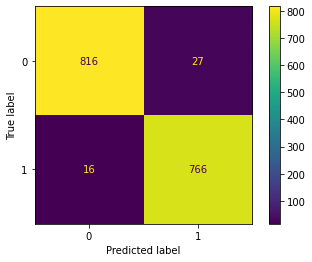

In [44]:
plot_confusion_matrix(DT,Xc_test,yc_test)

**Summary of Findings**

The initial model utilized 96 features to predict the target variable and achieved a 100% classification.  However, 5 of these features produced 97% accuracy.  This then goes to show that optimal feature selection is a very important step in building models.  This is because, it optimizes computing power and also prevent overfitting.